In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io


In [2]:
eigenFaces = np.load('olivetti_faces.npy')
grayScale = io.imread('basic-colors-2206285_640.jpg' , as_gray = True)

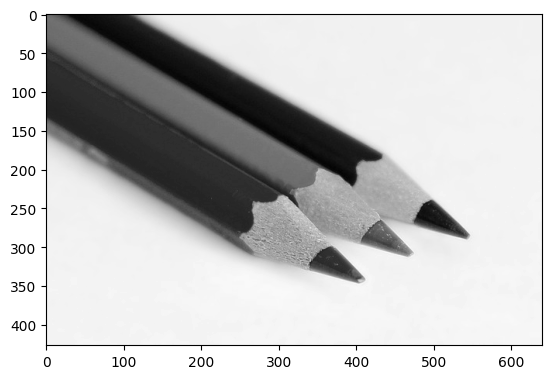

In [3]:
plt.imshow(grayScale , cmap='gray')

In [4]:
grayScale.shape

(427, 640)

In [5]:
class PCA:
    def __init__(self , n_components = None):
        self.n_components = n_components
        self.components = None
        self.df_mean = None
        self.df_std = None
    def fit(self , df):
        """
        
         df: An array of shape (n_samples, n_features).

        :return: None
        """
        # Data Standardization 
        self.df_mean = df.mean(axis = 0)
        self.df_std = df.std(axis = 0)
        self.standardized_df = (df - self.df_mean) / self.df_std
        
        # Transpose to calculate Covariance over Featured 
        cov_matrix = np.cov(self.standardized_df.T)
        
    
        eigenValues , eigenVectors = np.linalg.eig(cov_matrix)
    
        # sort Eigen Values in descending order and Save indices  
        sorted_ind = np.argsort(eigenValues)[::-1]
        self.components = eigenVectors[:, sorted_ind[:self.n_components]]
        print(f'Shape of Components is {self.components.shape}')
    def transform (self , df):
        # Data Standardization 
        standardized_df = (df - self.df_mean) / self.df_std
       
        # Project the data into the Eigen Vectors 
        projected_df = np.dot(standardized_df, self.components)
        
        return projected_df
    def inverse_transform (self , df):
        reconstructed_df = np.dot(df , self.components.T) + self.df_mean
        
        return reconstructed_df

        

# First Task 

In [6]:
pca2 = PCA(n_components=10)

In [7]:
pca2.fit(grayScale)

Shape of Components is (640, 10)


In [8]:
compressed_image = pca2.transform(grayScale)

In [9]:
recons = pca2.inverse_transform(compressed_image)

In [10]:
compressed_image.shape

(427, 10)

In [11]:
recons.shape

(427, 640)

C:\Users\aly86\AppData\Local\Temp\ipykernel_13380\1159012515.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[1].imshow(compressed_image.astype(float) , cmap='gray')
C:\Users\aly86\AppData\Local\Temp\ipykernel_13380\1159012515.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[2].imshow(recons.astype(float) , cmap='gray')


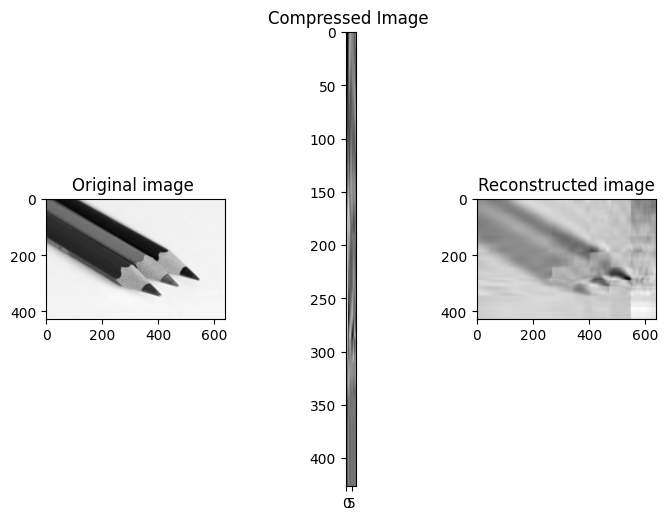

In [12]:
fig , ax = plt.subplots(1 , 3)

ax[0].imshow(grayScale , cmap='gray')
ax[0].set_title('Original image ')

ax[1].imshow(compressed_image.astype(float) , cmap='gray')
ax[1].set_title('Compressed Image ')


ax[2].imshow(recons.astype(float) , cmap='gray')
ax[2].set_title('Reconstructed image')

ax[0].set_aspect('equal')
ax[2].set_aspect('equal')

fig.set_size_inches(20 / 2.54, 15 / 2.54)

plt.show()

# Bouns Task

In [13]:
rgb_image = io.imread('basic-colors-2206285_640.jpg')


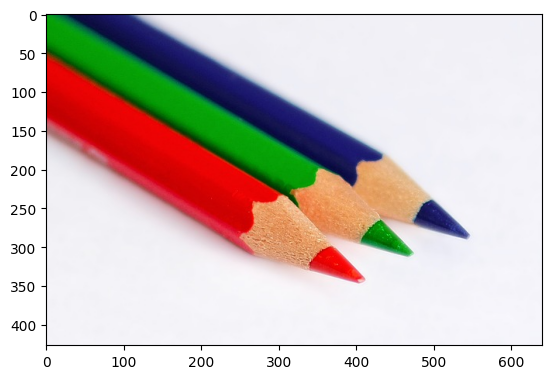

In [14]:
plt.imshow(rgb_image )

In [15]:
rgb_image.shape

(427, 640, 3)

In [16]:
r = rgb_image[:, :, 0]
g = rgb_image[:, :, 1]
b = rgb_image[:, :, 2]

In [17]:
r_mean = r.mean(axis = 0)
r_std = r.std(axis = 0)
standardized_r = (r - r_mean) / r_std
 
g_mean = g.mean(axis = 0)
g_std = g.std(axis = 0)
standardized_g = (g - g_mean) / g_std  

b_mean = b.mean(axis = 0)
b_std = b.std(axis = 0)
standardized_b = (b - b_mean) / b_std

In [18]:
pca_r = PCA(n_components=10)
pca_r.fit(standardized_r)
compressed_r = pca_r.transform(standardized_r)


Shape of Components is (640, 10)


In [19]:
pca_g = PCA(n_components=10)
pca_g.fit(standardized_g)
compressed_g = pca_g.transform(standardized_g)

Shape of Components is (640, 10)


In [20]:
pca_b = PCA(n_components=10)
pca_b.fit(standardized_b)
compressed_b = pca_b.transform(standardized_b)

Shape of Components is (640, 10)


In [21]:
compressed_rgb_image = np.stack([compressed_r, compressed_g, compressed_b], axis=2)


In [22]:
compressed_rgb_image.shape

(427, 10, 3)

In [23]:
recons_r = pca_r.inverse_transform(compressed_r)
recons_g = pca_g.inverse_transform(compressed_g)
recons_b = pca_b.inverse_transform(compressed_b)

In [24]:
reconstructed_rgb_image = np.stack([recons_r, recons_g, recons_b], axis=2)

In [25]:
reconstructed_rgb_image.shape

(427, 640, 3)

C:\Users\aly86\AppData\Local\Temp\ipykernel_13380\2347371774.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(reconstructed_rgb_image.astype(float))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


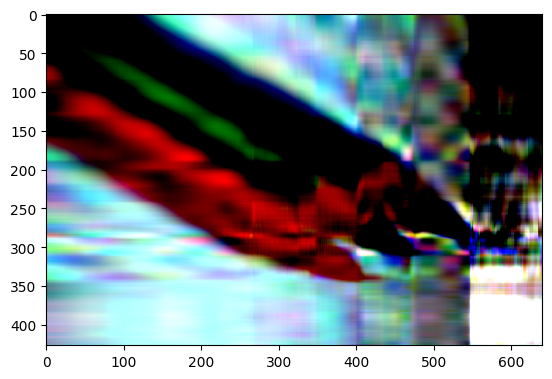

In [26]:
plt.imshow(reconstructed_rgb_image.astype(float))

In [27]:
eigenFaces.shape

(400, 64, 64)

In [28]:
eigenFaces=eigenFaces.copy().reshape(eigenFaces.shape[0],eigenFaces.shape[1]*eigenFaces.shape[2])

In [29]:
eigenFaces.shape

(400, 4096)

In [30]:
pca2 = PCA(n_components=10)

In [31]:
pca2.fit(eigenFaces)

Shape of Components is (4096, 10)


In [32]:
compressed_image = pca2.transform(eigenFaces)

In [33]:
recons = pca2.inverse_transform(compressed_image)

In [34]:
compressed_image.shape

(400, 10)

In [35]:
recons.shape

(400, 4096)

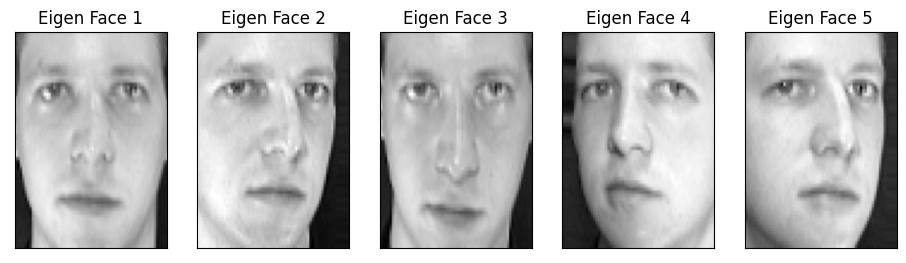

In [36]:
n_col,n_row=5,1
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.title("Eigen Face %s" % str(i + 1))
    plt.imshow(eigenFaces[i].reshape(64, 64), cmap='gray', aspect='auto')
    plt.xticks(())
    plt.yticks(())

plt.show()

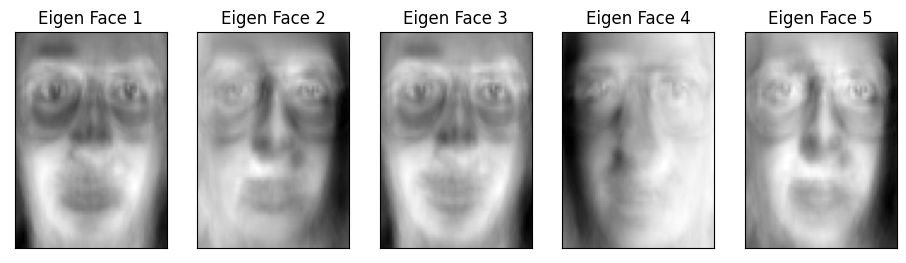

In [37]:
# n_col,n_row=5,1
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.title("Eigen Face %s" % str(i + 1))
    plt.imshow(recons[i].real.reshape(64, 64), cmap='gray', aspect='auto')
    plt.xticks(())
    plt.yticks(())
plt.show()    